# CS 254 Project 1, Approach 2: Image-based



### Google Colab Setup


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#%%
# from google.colab import drive
# drive.mount('/content/drive/')

import os

DATA_PATH_AFTER_MY_DRIVE = 'CS254/CS254-FinalProject/Data'
ECG_PATH_AFTER_DATA = 'ECG_Zheng et al 2022/_Processed/Images'
EEG_PATH_AFTER_DATA = 'EMG_DiNardo et al 2022/_Processed/Images'
EMG_PATH_AFTER_DATA = 'EEG_Kaya et al 2018/_Processed/Images'

DATA_PATH = os.path.join('drive','MyDrive',DATA_PATH_AFTER_MY_DRIVE)
ECG_PATH = os.path.join(DATA_PATH,ECG_PATH_AFTER_DATA)
EEG_PATH = os.path.join(DATA_PATH,EEG_PATH_AFTER_DATA)
EMG_PATH = os.path.join(DATA_PATH,EMG_PATH_AFTER_DATA)

# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks' # change this directory to yours
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

# Introduction

In this method, we will be performing basic image classification using simple labeled images created from electrophysiology signals.

We will visualize the data, split it into training, validation, and testing groups, and then atempt to model it with logistic regression methods from the sklearn library. After modeling, we will analyze the results and determine how well the model performed.

In [3]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
#function that you will use to convert matrix to dataframe, useful for visulization. 
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

## Part 0: Prepare the data

#### Load Data




In [6]:
sample_count_per_type = 100
data = np.zeros([sample_count_per_type*3,210*158]) # 1500 samples (500 per type), # features (pixels)
target = []
n = 0


# EEG data
IMAGE_PATH = EEG_PATH
for fn in os.listdir(IMAGE_PATH):
    # fn = FILES[file_index]
    if fn.endswith(".png"):
      print(fn)
      I = image.imread(IMAGE_PATH + "/" + fn)
      # plt.figure(1)
      # plt.imshow(I)
      # print(I.shape)
      # I = I[:,:,2] # only keep blue
      # plt.figure(2)
      # plt.imshow(I)
      # print(I.shape)
      I = I.flatten() # flatten image
      # print(I.shape)
      data[n,:] = I
      target.append('EEG')
      n = n+1
      if n == sample_count_per_type: break


# EMG data
IMAGE_PATH = EMG_PATH
for fn in os.listdir(IMAGE_PATH):
    # fn = FILES[file_index]
    if fn.endswith(".png"):
      print(fn)
      I = image.imread(IMAGE_PATH + "/" + fn)
      # plt.figure(1)
      # plt.imshow(I)
      # print(I.shape)
      # I = I[:,:,2] # only keep blue
      # plt.figure(2)
      # plt.imshow(I)
      # print(I.shape)
      I = I.flatten() # flatten image
      # print(I.shape)
      data[n,:] = I
      target.append('EMG')
      n = n+1
      if n == sample_count_per_type*2: break

# ECG data
IMAGE_PATH = ECG_PATH
for fn in os.listdir(IMAGE_PATH):
    # fn = FILES[file_index]
    if fn.endswith(".png"):
      print(fn)
      I = image.imread(IMAGE_PATH + "/" + fn)
      # plt.figure(1)
      # plt.imshow(I)
      # print(I.shape)
      # I = I[:,:,2] # only keep blue
      # plt.figure(2)
      # plt.imshow(I)
      # print(I.shape)
      I = I.flatten() # flatten image
      # print(I.shape)
      data[n,:] = I
      target.append('ECG')
      n = n+1
      if n == sample_count_per_type*3: break

print(data.shape)
print(target)




sample000000001.png
sample000000003.png
sample000000002.png
sample000000005.png
sample000000004.png
sample000000007.png
sample000000006.png
sample000000008.png
sample000000010.png
sample000000009.png
sample000000011.png
sample000000012.png
sample000000013.png
sample000000016.png
sample000000015.png
sample000000014.png
sample000000017.png
sample000000018.png
sample000000021.png
sample000000019.png
sample000000020.png
sample000000022.png
sample000000024.png
sample000000023.png
sample000000025.png
sample000000027.png
sample000000026.png
sample000000030.png
sample000000029.png
sample000000028.png
sample000000033.png
sample000000031.png
sample000000032.png
sample000000035.png
sample000000034.png
sample000000036.png
sample000000038.png
sample000000037.png
sample000000039.png
sample000000040.png
sample000000042.png
sample000000041.png
sample000000044.png
sample000000043.png
sample000000045.png
sample000000046.png
sample000000048.png
sample000000047.png
sample000000050.png
sample000000049.png


In [7]:
pca = PCA(n_components = 10) # create the principle component using PCA object
transformed_data = pca.fit_transform(data) #  reduce the data 
print(transformed_data.shape)


(300, 10)


#### Train Test Split
- To validate model performance and generalization ability, we need to create training and testing groups.
- Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.htmlsklearn"> train_test_split function </a> to split your dataset into training data and testing data. This function has already been imported; you simply need to correctly call it and store its output.


<b>Important: when you call this function, you must use a test size of 0.25 and a random_state of 0.*</b>

In [8]:
# print(data.shape)
# print(target.shape)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 0) # add your code here


#### Logistic Regression model
- Create a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression"> LogisticRegression</a> object. This object has already been imported from sklearn's linear_model class. You do not need to add any additional arguments to the object's initialization, the default settings will be fine.
- Call LogisticRegression's .fit() function on your model, using your training data as parameters.
- Call LogisticRegression's .predict() function on your model using your testing data as a parameter and store the results.

In [9]:
# add your code here
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) 
y_test_predict = log_reg.predict(x_test)
print(x_test.shape, y_test_predict.shape)

(75, 33180) (75,)


#### Visualization
- Use sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">confusion matrix</a> function to obtain a confusion matrix of your results.
- print this confusion matrix.
- Display this confusion matrix as a heatmap using pyplot's imshow() function, with true class names along the x axis and predicted class names along the y axis.

Recall the general form of a confusion matrix:

![alt_text](https://drive.google.com/uc?id=1ddazyReK2QGcSFwt7MDBswOJchsSGnza)


This example is a simple binary - classes are either "yes" or "no". The matrix you will be for three classes. The value at a given index [i,j] will indicate how many times the model classified data from class i as being from class j. A correct classification has been made when i and j are the same. Therefore, if the model is working correctly, we should see a diagonal line of higher numbers running from [0,0] to [2,2] in the confusion matrix, and very low numbers everywhere else.

In [10]:
conf_matrix = confusion_matrix(np.array(y_test),y_test_predict)
conf_matrix_to_df(conf_matrix, np.unique(target))

,ECG,EEG,EMG
ECG,25,0,1
EEG,2,22,0
EMG,3,5,17


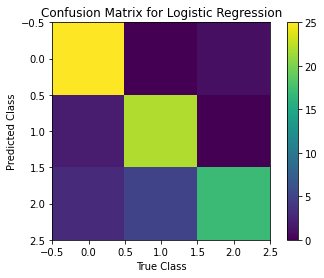

In [11]:
# add your code here to visualize the confusion matrix heat map, the output should look similar to the image below.
# hint use plt.imshow and plt.colorbar() functions
plt.figure('Confusion Matrix',clear = True)
plt.imshow(conf_matrix)
plt.colorbar()
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix for Logistic Regression')
plt.savefig('confusion_matrix_for_logitist_regression.png')

#### Q6) (15 points) Performance Metrics
- Write your own code to calculate the precision and recall values for all classes. The basic forumulas for precision and recall are provided below. 

![alt_text](https://drive.google.com/uc?id=1yXpun8xeq87UI6kCKILkdaHPiQNtWUe5)

Compare your results with the sklearn's classification_report function to make sure your are getting the same results.

In [12]:
# add your code here to call classification_report from sklearn. you should get similar to the output below
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         ECG       0.83      0.96      0.89        26
         EEG       0.81      0.92      0.86        24
         EMG       0.94      0.68      0.79        25

    accuracy                           0.85        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75

